In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/A73_Oplopend.csv")
df.head()

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Weekday,Duration_Categorical,Year,Month,Day
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.679159,0.0,Winter,0.666667,1,3,0,2015,1,1
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.034589,0.0,Winter,0.833333,1,3,0,2015,1,1
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.887386,0.0,Winter,2.500000,1,3,0,2015,1,1
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,31.619510,0.0,Winter,0.666667,1,3,0,2015,1,1
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,27.374241,0.0,Winter,-7.000000,1,3,0,2015,1,1


In [3]:
df2 = pd.read_csv("datasets/A73_Aflopend.csv",low_memory=False)
df2['HectometerDirection'].unique()

array([nan, 'aflopend'], dtype=object)

In [4]:
df3 = pd.read_csv("datasets/A2_Oplopend.csv", low_memory=False)
df3['HectometerDirection'].unique()

array([nan, 'oplopend'], dtype=object)

In [5]:
df1 = pd.read_csv("datasets/A2_Aflopend.csv", low_memory=False)
df1.head()

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Weekday,Duration_Categorical,Year,Month,Day
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.679159,0.0,Winter,0.666667,1,3,0,2015,1,1
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.034589,0.0,Winter,0.833333,1,3,0,2015,1,1
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.887386,0.0,Winter,2.500000,1,3,0,2015,1,1
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,31.619510,0.0,Winter,0.666667,1,3,0,2015,1,1
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,27.374241,0.0,Winter,-7.000000,1,3,0,2015,1,1


In [6]:
df.shape


(86335, 46)

In [7]:
df1.shape

(144645, 46)

In [8]:
df['HectometerDirection'] = 1
df['HectometerDirection']

0        1
1        1
2        1
3        1
4        1
        ..
86330    1
86331    1
86332    1
86333    1
86334    1
Name: HectometerDirection, Length: 86335, dtype: int64

In [9]:
df1['HectometerDirection'] = 0
df1['HectometerDirection']

0         0
1         0
2         0
3         0
4         0
         ..
144640    0
144641    0
144642    0
144643    0
144644    0
Name: HectometerDirection, Length: 144645, dtype: int64

In [10]:
df2['HectometerDirection'] = 0
df2['HectometerDirection']

0        0
1        0
2        0
3        0
4        0
        ..
82884    0
82885    0
82886    0
82887    0
82888    0
Name: HectometerDirection, Length: 82889, dtype: int64

In [11]:
df3['HectometerDirection'] = 1
df3['HectometerDirection']

0         1
1         1
2         1
3         1
4         1
         ..
150198    1
150199    1
150200    1
150201    1
150202    1
Name: HectometerDirection, Length: 150203, dtype: int64

In [12]:
a73 = pd.concat([df, df2], axis=0, ignore_index=True)
a73.shape

(169224, 46)

In [13]:
a2 = pd.concat([df1, df3], axis=0, ignore_index=True)
a2.shape

(294848, 46)

In [14]:
combined = pd.concat([a73, a2], axis=0, ignore_index=True)
combined.shape

(464072, 46)

In [15]:
combined['RoadDescr'].value_counts()

RoadDescr
A2     294848
A73    169224
Name: count, dtype: int64

In [16]:
combined['RoadDescr'] = combined['RoadDescr'].apply(lambda x: 0 if x == 'A73' else 1 if x == 'A2' else df['RoadDescr'])


In [17]:
combined['RoadDescr']

0         0
1         0
2         0
3         0
4         0
         ..
464067    1
464068    1
464069    1
464070    1
464071    1
Name: RoadDescr, Length: 464072, dtype: int64

In [18]:
combined.head()

,StartDateTime,TrafficJamNum,StartDate,EndDate,StartTime,EndTime,Severity,Length,Duration,HectometerStart,...,Visibility (m),Precipitation Amount (mm),Season,Temperature (0.1°C),DOP Sector,Weekday,Duration_Categorical,Year,Month,Day
0,2015-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.679159,0.0,Winter,0.666667,1,3,0,2015,1,1
1,2015-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.034589,0.0,Winter,0.833333,1,3,0,2015,1,1
2,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,25.887386,0.0,Winter,2.500000,1,3,0,2015,1,1
3,2015-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,31.619510,0.0,Winter,0.666667,1,3,0,2015,1,1
4,2015-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,...,27.374241,0.0,Winter,-7.000000,1,3,0,2015,1,1


In [19]:
data = combined.copy()

In [20]:
data = data[data['RoadDescr'] == 1] #can be used in order to be able to see predictions for each road specifically

In [21]:
combined['Duration_Categorical'].value_counts()

Duration_Categorical
0    272541
1    136861
3     28809
2     25861
Name: count, dtype: int64

# Modelling
## Prediction of duration category
### Random Forest Classifier

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
target = "Duration_Categorical"
y = combined[target]
features = ['Hour','Month', 'Year', 'Day','RoadDescr','HectometerDirection', 'Weekday'] #holiday adds 0.002, add weekend
X = combined[features]

In [24]:
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42 )
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.848117222431719

In [28]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))#weatger

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     54477
           1       0.73      0.90      0.80     27466
           2       0.17      0.05      0.08      5115
           3       0.22      0.07      0.11      5757

    accuracy                           0.85     92815
   macro avg       0.52      0.50      0.49     92815
weighted avg       0.80      0.85      0.82     92815



In [29]:
df = combined.copy()

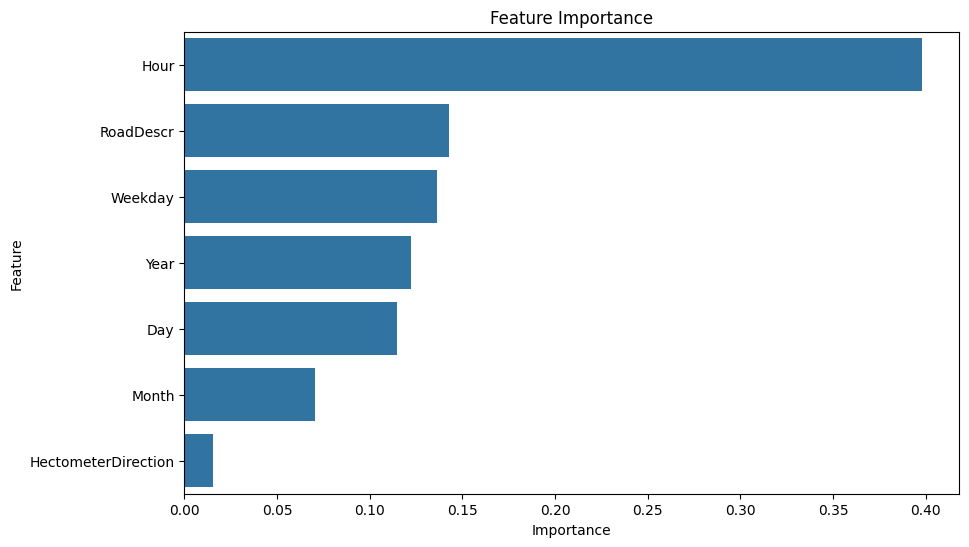

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

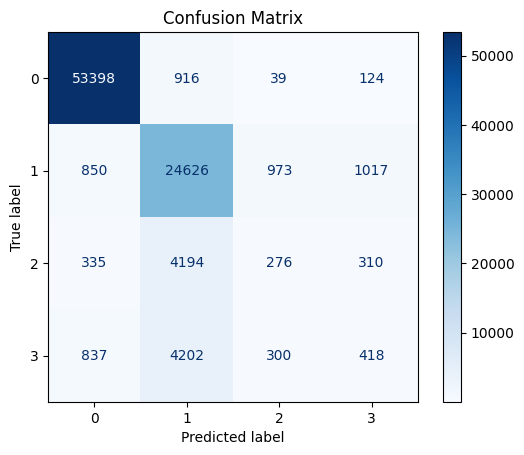

In [31]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Predictions

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Function to preprocess the data
def preprocess_data(df, features, target):
    X = df[features].copy()
    y = df[target].copy()
    
    # Converting all features to integer (if they are not already)
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
    
    # Encode 'RoadDescr' if it's not already numeric
    label_encoder = None
    if X['RoadDescr'].dtype == 'object':
        label_encoder = LabelEncoder()
        X['RoadDescr'] = label_encoder.fit_transform(X['RoadDescr'])
    
    return X, y, label_encoder

# Function to train the model
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    
    return model, label_encoder

# Function to make predictions with hardcoded input values
def predict_with_hardcoded_values(model, label_encoder=None):
    # Hardcoded input values
    input_data = pd.DataFrame({
        'Hour': [7],
        'Month': [12],
        'Year': [2024],
        'Day': [25],
        'RoadDescr': ['1'],
        'HectometerDirection': [1],
        'Weekday':[1]
    })
    
    # Encode 'RoadDescr' if a label encoder was used during training
    if label_encoder is not None:
        input_data['RoadDescr'] = label_encoder.transform(input_data['RoadDescr'])
    
    # Ensuring all features are integer
    input_data = input_data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
    
    # Making the prediction
    prediction = model.predict(input_data)
    
    # Visualizing the prediction
    print(f"Predicted Severity Category: {prediction[0]}")
    visualize_prediction(input_data, prediction[0])

# Function to visualize the input data and prediction
def visualize_prediction(input_data, prediction):
    fig, ax = plt.subplots()
    table_data = input_data.values[0]
    column_labels = input_data.columns.tolist()
    row_labels = ["Input Values"]
    
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=[table_data], colLabels=column_labels, rowLabels=row_labels, loc='center')
    ax.set_title(f'Predicted Severity Category: {prediction}', fontsize=14)
    
    plt.show()


Accuracy: 0.848117222431719
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     54477
           1       0.73      0.90      0.80     27466
           2       0.17      0.05      0.08      5115
           3       0.22      0.07      0.11      5757

    accuracy                           0.85     92815
   macro avg       0.52      0.50      0.49     92815
weighted avg       0.80      0.85      0.82     92815

Predicted Severity Category: 0


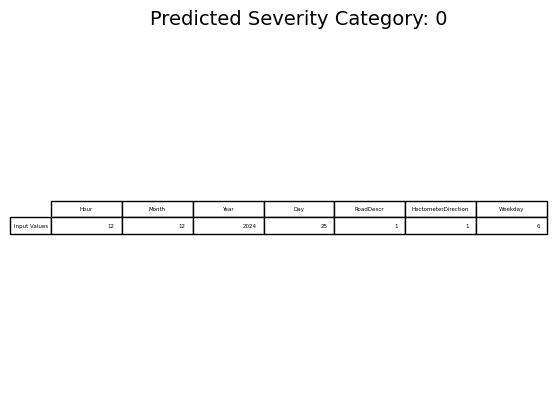

In [33]:

# Assuming 'combined' is your DataFrame
features = ['Hour','Month', 'Year', 'Day','RoadDescr','HectometerDirection', 'Weekday'] #holiday adds 0.002, add weekend
target = "Duration_Categorical"

# Preprocess the data
X, y, label_encoder = preprocess_data(combined, features, target)

# Train the model
rf_classifier, label_encoder = train_model(X, y)

# Make predictions with hardcoded values
predict_with_hardcoded_values(rf_classifier, label_encoder)

### GBM

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [35]:
target = "Duration_Categorical"
y = combined[target]
features = ['Hour','Month', 'Year','RoadDescr', 'Day','HectometerDirection', 'Weekday'] #holiday adds 0.002, add weekend
X = combined[features]

In [36]:
Categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64", "int32"]
).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create a pipeline that first transforms the data and then applies the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', gbm_classifier)
])

# Train the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     54477
           1       0.67      0.91      0.77     27466
           2       0.00      0.00      0.00      5115
           3       0.00      0.00      0.00      5757

    accuracy                           0.82     92815
   macro avg       0.40      0.46      0.43     92815
weighted avg       0.74      0.82      0.78     92815



C:\Users\V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

## Prediction of exact duration

### Random Forest Regressor

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
target = "Duration"
y = combined[target]
features = ['Hour','Month', 'Year','RoadDescr', 'Day','HectometerDirection','Duration_Categorical', 'Weekday'] #holiday adds 0.002, add weekend
X = combined[features]

# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42 )
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred = rf_regressor.predict(X_test)

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2.937560038043324
Mean Squared Error (MSE): 142.24468908005082
Root Mean Squared Error (RMSE): 11.926637794451999
R-squared (R²): 0.6050485951488856


C:\Users\V\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### GBR

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features and target
target = "Duration"
y = combined[target]
features = ['Hour','Month', 'Year','RoadDescr', 'Day','HectometerDirection','Duration_Categorical', 'Weekday'] #holiday adds 0.002, add weekend
X = combined[features]

# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Convert all categorical features to strings
categorical_features = X.select_dtypes(include=["object"]).columns
X[categorical_features] = X[categorical_features].astype(str)


In [47]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42
)

In [48]:
categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64", "int32"]
).columns.tolist()

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [50]:
pipeline = Pipeline(
   [
       ("preprocessor", preprocessor),
       ("regressor", GradientBoostingRegressor(random_state=42)),
   ]
)

In [51]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hour', 'Month', 'Year',
                                                   'RoadDescr', 'Day',
                                                   'HectometerDirection',
                                                   'Duration_Categorical',
                                                   'Weekday']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [52]:
y_pred = pipeline.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.744550752656304
Mean Squared Error (MSE): 110.67965868672107
Root Mean Squared Error (RMSE): 10.520440042446944
R-squared (R²): 0.6926909048803784


### LSTM

In [71]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [72]:
target = "Duration"
y = combined[target]
features = ['Day' ,'Hour', 'Month','Year','Duration_Categorical','HectometerDirection', 'RoadDescr', 'Weekday']
X = combined[features]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
n_steps = 1  # Number of time steps (since it's hourly data)
n_features = X_train_scaled.shape[1]
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], n_steps, n_features))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], n_steps, n_features))


In [75]:
input_shape = (n_steps, n_features)

In [76]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [77]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [78]:
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 11s 875us/step - loss: 233.6618
Epoch 2/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 10s 883us/step - loss: 148.3665
Epoch 3/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 10s 891us/step - loss: 134.0695
Epoch 4/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 10s 892us/step - loss: 138.4169
Epoch 5/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 10s 900us/step - loss: 149.0071
Epoch 6/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 11s 906us/step - loss: 141.0011
Epoch 7/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 11s 934us/step - loss: 143.3488
Epoch 8/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 11s 943us/step - loss: 134.9983
Epoch 9/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 11s 916us/step - loss: 137.8016
Epoch 10/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 11s 924us/step - loss: 136.3481
Epoch 11/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 10s 898us/step - loss: 152.8550
Epoch 12/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 11s 923us/step - loss: 133.0717
Epoch 13/50
11602/11602 ━━━━━━━━━━━━━━━━━━━━ 11s 923us/step - loss: 145.9589
Epoch 14

In [79]:
y_pred = model.predict(X_test_lstm)

2901/2901 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [80]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2.8621700513617885
Mean Squared Error (MSE): 116.04473050921808
Root Mean Squared Error (RMSE): 10.772405975881993
R-squared (R²): 0.6777944425440598
